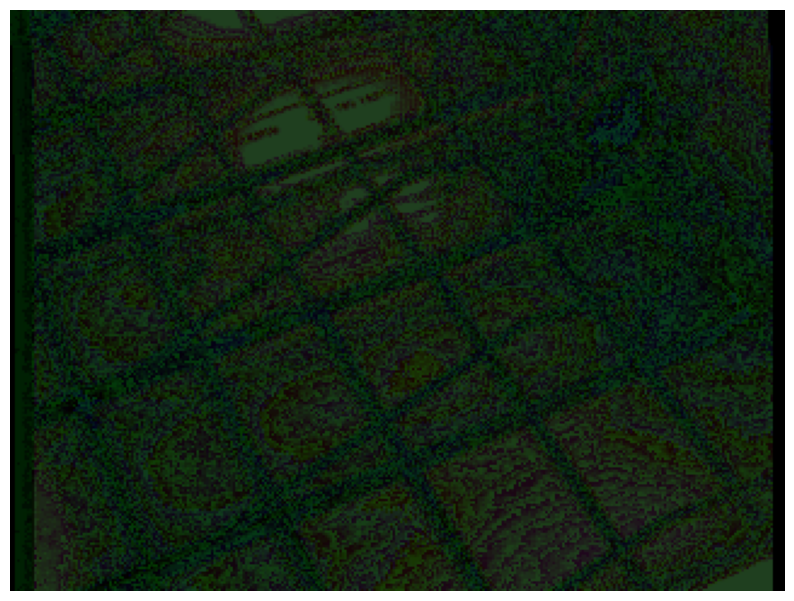

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def load_rgb565(filename, width, height):
    """ Load raw RGB565 file (2 bytes per pixel) and return as numpy array """
    with open(filename, 'rb') as f:
        rgb_data = np.frombuffer(f.read(), dtype=np.uint8)
    # Ensure data size matches expected resolution
    expected_size = width * height * 2
    assert len(rgb_data) == expected_size, f"Invalid file size: Expected {expected_size}, got {len(rgb_data)}"
    return rgb_data

def rgb565_to_rgb(raw_data, width=320, height=240, flip_vertical=False, flip_horizontal=False):
    """
    Convert RGB565 (16-bit per pixel) format to RGB888.
    RGB565 format: 5 bits red, 6 bits green, 5 bits blue packed in 2 bytes
    
    Args:
        raw_data: Raw bytes in RGB565 format
        width: Image width
        height: Image height
        flip_vertical: If True, flip the image top to bottom
        flip_horizontal: If True, flip the image left to right
    
    Returns:
        RGB numpy array of shape (height, width, 3)
    """
    # Convert bytes to uint16 array
    pixels = np.frombuffer(raw_data, dtype=np.uint16)
    pixels = pixels.reshape((height, width))
    
    # Extract RGB components
    # RGB565: RRRR RGGG GGGB BBBB
    r = ((pixels & 0xF800) >> 11).astype(np.uint8)  # 5 bits red
    g = ((pixels & 0x07E0) >> 5).astype(np.uint8)   # 6 bits green
    b = (pixels & 0x001F).astype(np.uint8)          # 5 bits blue
    
    # Scale to full 8-bit range
    #r = (r * 255 // 31)  # 5 bits to 8 bits
    #g = (g * 255 // 63)  # 6 bits to 8 bits
    #b = (b * 255 // 31)  # 5 bits to 8 bits
    
    # Stack channels
    rgb = np.stack([r, g, b], axis=2)
    
    # Apply flipping if requested
    if flip_vertical:
        rgb = np.flipud(rgb)
    if flip_horizontal:
        rgb = np.fliplr(rgb)
    
    return rgb

def display_rgb565(raw_data, width=320, height=240, flip_vertical=False, flip_horizontal=False):
    """
    Convert RGB565 data to RGB and display using matplotlib
    
    Args:
        raw_data: Raw bytes in RGB565 format
        width: Image width
        height: Image height
        flip_vertical: If True, flip the image top to bottom
        flip_horizontal: If True, flip the image left to right
    """
    rgb = rgb565_to_rgb(raw_data, width, height, flip_vertical, flip_horizontal)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()
    
    return rgb

# Read file
rgb_data = load_rgb565("output.raw", 320, 240)

# Display RGB image
rgb_image = display_rgb565(rgb_data)
